In [5]:
import json

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

import rental_utils; reload(rental_utils)

ImportError: No module named geopandas

In [56]:
train_raw = rental_utils.clean(pd.read_json('Data/train.json'))
test_raw = rental_utils.clean(pd.read_json('Data/test.json'))
data, independent, test = rental_utils.load_data()
[X_train, X_val, y_train, y_val] = data
train = pd.concat([X_train, X_val])
train_raw.head()

Loading raw data
Adding features
Adding regions
Adding variables
Dummyfying
Splitting data


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address,rooms
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,4.5
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[doorman, elevator, fitness center, cats allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,3.0
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[laundry in building, dishwasher, hardwood flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,2.0
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[hardwood floors, no fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,2.0
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[prewar],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,5.0


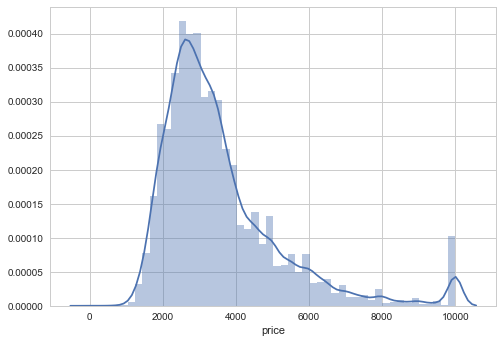

In [4]:
sns.distplot(train['price'])

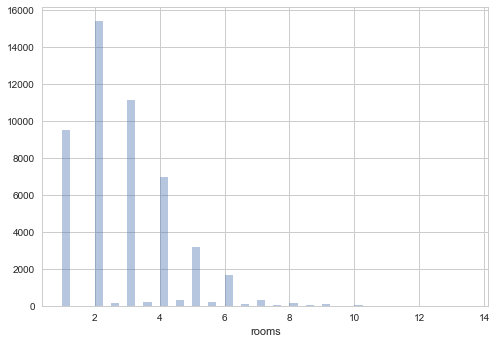

In [5]:
sns.distplot(train['rooms'], kde=False)

In [106]:
manager_grouped = train_raw.groupby('manager_id')

manager_listings = pd.DataFrame(manager_grouped['listing_id'].agg(len))
manager_listings.reset_index(inplace=True)
manager_listings.columns = ['manager_id', 'n_listings']
manager_listings.head()

,manager_id,n_listings
0,0000abd7518b94c35a90d64b56fbf3e6,12
1,001ce808ce1720e24a9510e014c69707,10
2,003fc4e9a70053082f131b1054966aaf,1
3,00607a02f6efd9c6c7c588826e471ee9,2
4,00995ff28d79127ed2dca8320e9e7d09,3


In [112]:
manager_interest_high = pd.DataFrame(manager_grouped['interest_level'].agg(lambda x: sum(x=='high')/len(x)))
manager_interest_high.reset_index(inplace=True)
manager_interest_high.columns = ['manager_id', 'manager_interest_high']
manager_interest_high.head()

,manager_id,manager_interest_high
0,0000abd7518b94c35a90d64b56fbf3e6,0
1,001ce808ce1720e24a9510e014c69707,0
2,003fc4e9a70053082f131b1054966aaf,0
3,00607a02f6efd9c6c7c588826e471ee9,0
4,00995ff28d79127ed2dca8320e9e7d09,0


In [114]:
train_raw['description']

0        A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
1                                                         
2        Top Top West Village location, beautiful Pre-w...
3        Building Amenities - Garage - Garden - fitness...
4        Beautifully renovated 3 bedroom flex 4 bedroom...
5                                                         
6        Stunning unit with a great location and lots o...
7        This huge sunny ,plenty of lights 1 bed/2 bath...
8                                 <p><a  website_redacted 
9        This is a spacious four bedroom with every bed...
10       New to the market! Spacious studio located in ...
11       Check out this one bedroom apartment in a grea...
12       ***LOW FEE. Beautiful CHERRY OAK WOODEN FLOORS...
13       Lincoln Square's premier full service building...
14       Spacious 1-Bedroom to fit King-sized bed comfo...
15       Stunning  full renovated studio unit. High cei...
16       East Village is a great community with great p.